In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
df1 = pd.read_csv("abc.csv")
df1.head()

,RAM,Storage,Display,Camera,Battery,Weight,Thickness,Screen-to-Body Ratio,Price_Range,Processor_Speed,Front_Camera,Battery_Life,Price,Phone_Company
0,8,256,5.4,13.0,5000.0,164.3,6.7,89.5,Mid-Range,2.723417,12.0,28.3,52388,Samsung
1,12,256,6.0,44.0,4000.0,112.4,7.9,90.7,High-End,3.009767,5.0,13.3,45678,Sony
2,14,256,5.6,46.0,3300.0,207.0,11.2,83.3,Budget,2.165280,8.0,24.3,40302,Sony
3,13,64,6.0,21.0,3300.0,115.8,10.1,96.8,Budget,1.809457,8.0,23.2,31790,OnePlus
4,8,128,5.8,21.0,4000.0,198.9,6.4,91.7,High-End,1.914318,8.0,25.7,39204,OnePlus


In [2]:
df1.shape

(124700, 14)

In [3]:
df1.groupby('Price_Range')['Price_Range'].agg('count')

Price_Range
Budget       41334
High-End     41673
Mid-Range    41677
Name: Price_Range, dtype: int64

# Removing unnecesary specifications that do not affect price

In [4]:
df2 = df1.drop(['Thickness','Weight'],axis='columns')
df2.head()

,RAM,Storage,Display,Camera,Battery,Screen-to-Body Ratio,Price_Range,Processor_Speed,Front_Camera,Battery_Life,Price,Phone_Company
0,8,256,5.4,13.0,5000.0,89.5,Mid-Range,2.723417,12.0,28.3,52388,Samsung
1,12,256,6.0,44.0,4000.0,90.7,High-End,3.009767,5.0,13.3,45678,Sony
2,14,256,5.6,46.0,3300.0,83.3,Budget,2.165280,8.0,24.3,40302,Sony
3,13,64,6.0,21.0,3300.0,96.8,Budget,1.809457,8.0,23.2,31790,OnePlus
4,8,128,5.8,21.0,4000.0,91.7,High-End,1.914318,8.0,25.7,39204,OnePlus


In [5]:
df2.isnull().sum()

RAM                      0
Storage                  0
Display                  0
Camera                  11
Battery                 27
Screen-to-Body Ratio    12
Price_Range             16
Processor_Speed          0
Front_Camera            13
Battery_Life             0
Price                    0
Phone_Company            0
dtype: int64

In [6]:
df3 = df2.dropna()
df3.isnull().sum()

RAM                     0
Storage                 0
Display                 0
Camera                  0
Battery                 0
Screen-to-Body Ratio    0
Price_Range             0
Processor_Speed         0
Front_Camera            0
Battery_Life            0
Price                   0
Phone_Company           0
dtype: int64

In [7]:
df3.shape

(124621, 12)

In [8]:
df3['Battery'].unique()

array([ 5000.,  4000.,  3300.,  4500.,  3000., 10000.,  8000.])

In [9]:
df3[df3.Battery>6000]

,RAM,Storage,Display,Camera,Battery,Screen-to-Body Ratio,Price_Range,Processor_Speed,Front_Camera,Battery_Life,Price,Phone_Company
3151,4,256,5.9,50.0,10000.0,93.9,High-End,1.835298,16.0,28.3,36404,OnePlus
3961,11,32,5.7,38.0,8000.0,87.1,Budget,2.255572,5.0,31.4,30816,Vivo


In [10]:
# 10000 mAh and 8000 mAh battery won't be feasible in real world
df4 = df3.drop(df3[df3['Battery']>6000 ].index, inplace = True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
# checking
df3[df3.Battery>6000]

,RAM,Storage,Display,Camera,Battery,Screen-to-Body Ratio,Price_Range,Processor_Speed,Front_Camera,Battery_Life,Price,Phone_Company


In [12]:
df3.Camera.unique()

array([13., 44., 46., 21., 36., 30., 53., 48., 25., 55., 10., 42., 32.,
       40.,  8., 49., 19., 34., 28., 51., 24., 23., 29., 11., 39., 15.,
       26., 31., 27., 47.,  9., 45., 20., 37., 41., 43., 52., 14., 33.,
       12., 35., 22., 17., 50., 18., 16., 54., 38.])

In [13]:
df5 = df3.copy()
df5['memory_per_processor_cycle'] = df5['Storage']*100000/df5['Processor_Speed']
df5.head()

,RAM,Storage,Display,Camera,Battery,Screen-to-Body Ratio,Price_Range,Processor_Speed,Front_Camera,Battery_Life,Price,Phone_Company,memory_per_processor_cycle
0,8,256,5.4,13.0,5000.0,89.5,Mid-Range,2.723417,12.0,28.3,52388,Samsung,9.399955e+06
1,12,256,6.0,44.0,4000.0,90.7,High-End,3.009767,5.0,13.3,45678,Sony,8.505641e+06
2,14,256,5.6,46.0,3300.0,83.3,Budget,2.165280,8.0,24.3,40302,Sony,1.182295e+07
3,13,64,6.0,21.0,3300.0,96.8,Budget,1.809457,8.0,23.2,31790,OnePlus,3.536972e+06
4,8,128,5.8,21.0,4000.0,91.7,High-End,1.914318,8.0,25.7,39204,OnePlus,6.686456e+06


In [14]:
df5[df5.Storage/df5.RAM<2.2]


,RAM,Storage,Display,Camera,Battery,Screen-to-Body Ratio,Price_Range,Processor_Speed,Front_Camera,Battery_Life,Price,Phone_Company,memory_per_processor_cycle
197,15,32,5.7,27.0,5000.0,83.6,Mid-Range,2.006377,16.0,28.0,44784,Sony,1.594915e+06
249,15,32,5.1,18.0,5000.0,91.7,Budget,1.715586,12.0,14.5,44431,Vivo,1.865252e+06
329,15,32,5.6,15.0,3300.0,96.4,Mid-Range,2.369850,12.0,24.7,30947,Oppo,1.350296e+06
354,15,32,6.7,35.0,5000.0,93.0,Budget,2.706835,5.0,32.6,44951,Google,1.182192e+06
356,15,32,6.4,40.0,4000.0,80.7,High-End,2.386125,16.0,29.6,36827,Huawei,1.341087e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124403,15,32,5.4,28.0,3300.0,86.6,High-End,2.861270,5.0,27.1,31210,Sony,1.118385e+06
124437,15,32,6.1,46.0,4000.0,89.0,High-End,2.701377,8.0,12.8,37212,Xiaomi,1.184581e+06
124438,15,32,6.6,28.0,3300.0,96.2,Budget,3.331437,5.0,26.8,31065,Vivo,9.605466e+05
124450,15,32,6.4,19.0,4500.0,90.0,High-End,2.189343,16.0,24.0,40398,Huawei,1.461625e+06


In [15]:
df5.shape

(124619, 13)

In [16]:
df6 = df5[~(df5.Storage/df5.RAM<2.2)]
df6.shape

(121992, 13)

# Outlier Removal Using Standard Deviation and Mean

In [17]:
df6.memory_per_processor_cycle.describe()

count    1.219920e+05
mean     5.163487e+06
std      3.958492e+06
min      9.142977e+05
25%      1.962885e+06
50%      3.902439e+06
75%      7.737635e+06
max      1.706654e+07
Name: memory_per_processor_cycle, dtype: float64

In [18]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('RAM'):
        m = np.mean(subdf.memory_per_processor_cycle)
        st = np.std(subdf.memory_per_processor_cycle)
        reduced_df = subdf[(subdf.memory_per_processor_cycle>(m-2*st)) & (subdf.memory_per_processor_cycle<=(m+2*st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_pps_outliers(df6)
df8.shape

(114821, 13)

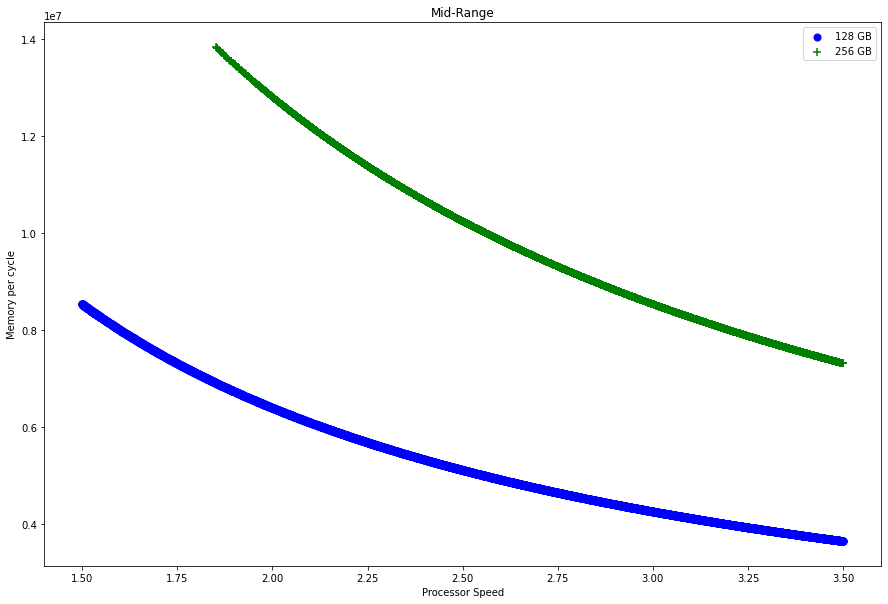

In [19]:
def plot_scatter_chart(df,Price_Range):
    Storage128 = df[(df.Price_Range==Price_Range) & (df.Storage==128)]
    Storage256 = df[(df.Price_Range==Price_Range) & (df.Storage==256)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(Storage128.Processor_Speed,Storage128.memory_per_processor_cycle,color='blue',label='128 GB', s=50)
    plt.scatter(Storage256.Processor_Speed,Storage256.memory_per_processor_cycle,marker='+', color='green',label='256 GB', s=50)
    plt.xlabel("Processor Speed")
    plt.ylabel("Memory per cycle")
    plt.title(Price_Range)
    plt.legend()
    
plot_scatter_chart(df8,"Mid-Range")

Text(0, 0.5, 'Count')

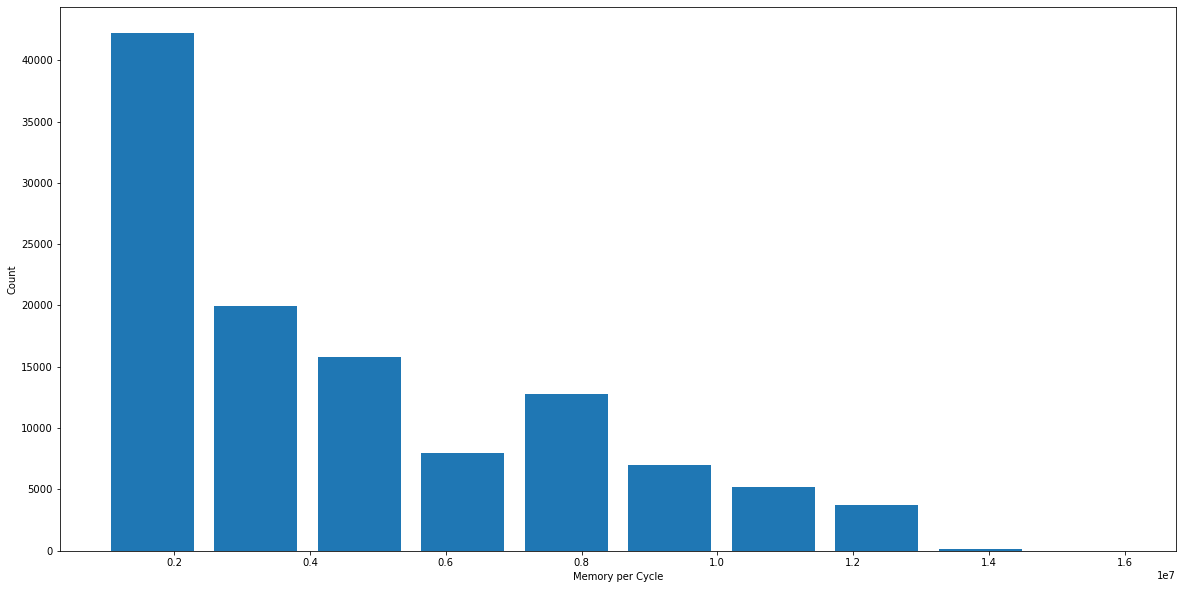

In [20]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.memory_per_processor_cycle,rwidth=0.8)
plt.xlabel("Memory per Cycle")
plt.ylabel("Count")

# Outlier Removal Using RAM Feature

In [21]:
df8.RAM.unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18],
      dtype=int64)

In [22]:
df8.shape

(114821, 13)

In [23]:
df8[df8.RAM>15]

,RAM,Storage,Display,Camera,Battery,Screen-to-Body Ratio,Price_Range,Processor_Speed,Front_Camera,Battery_Life,Price,Phone_Company,memory_per_processor_cycle
114815,16,128,5.8,54.0,4000.0,83.5,Mid-Range,2.476992,16.0,24.9,40397,Huawei,5.167558e+06
114816,16,256,6.5,36.0,3300.0,81.2,Budget,2.371063,8.0,16.9,40311,Oppo,1.079684e+07
114817,16,256,6.3,38.0,3300.0,81.6,Mid-Range,3.052886,5.0,26.1,39490,Vivo,8.385507e+06
114818,16,256,6.9,10.0,3000.0,95.4,Budget,3.133670,12.0,33.0,36419,Vivo,8.169335e+06
114819,18,256,5.6,26.0,4500.0,83.4,Budget,1.583883,12.0,31.4,49605,Vivo,1.616281e+07
114820,18,64,5.8,41.0,4500.0,81.1,Budget,3.472176,8.0,30.6,41157,Samsung,1.843225e+06


In [24]:
df9 = df8[df8.RAM<16]
df9.shape

(114815, 13)

In [25]:
# After removal of outliers we will drop the Memory_per_Cycle field
df10 = df9.drop(['Price_Range','memory_per_processor_cycle'],axis='columns')
df10.head(3)

,RAM,Storage,Display,Camera,Battery,Screen-to-Body Ratio,Processor_Speed,Front_Camera,Battery_Life,Price,Phone_Company
0,4,128,5.6,25.0,5000.0,88.8,3.131432,12.0,34.2,46658,Xiaomi
1,4,32,6.8,51.0,3300.0,82.5,1.992469,12.0,20.6,29690,OnePlus
2,4,32,5.0,24.0,4500.0,91.3,2.903181,12.0,12.6,38718,Huawei


# Model Building

In [26]:
X = df10.drop('Price',axis='columns')
X.head()

,RAM,Storage,Display,Camera,Battery,Screen-to-Body Ratio,Processor_Speed,Front_Camera,Battery_Life,Phone_Company
0,4,128,5.6,25.0,5000.0,88.8,3.131432,12.0,34.2,Xiaomi
1,4,32,6.8,51.0,3300.0,82.5,1.992469,12.0,20.6,OnePlus
2,4,32,5.0,24.0,4500.0,91.3,2.903181,12.0,12.6,Huawei
3,4,64,6.5,31.0,4000.0,91.9,2.679900,8.0,18.8,Google
4,4,128,5.5,31.0,4500.0,89.2,1.754605,5.0,22.4,Samsung


In [27]:
y = df10.Price
y.head()

# Using one hot encoding
dummies=pd.get_dummies(df10.Phone_Company)
dummies.head(3)


,Google,Huawei,OnePlus,Oppo,Samsung,Sony,Vivo,Xiaomi
0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0


In [28]:
df11=pd.concat([df10,dummies],axis='columns')
df11.head(3)

,RAM,Storage,Display,Camera,Battery,Screen-to-Body Ratio,Processor_Speed,Front_Camera,Battery_Life,Price,Phone_Company,Google,Huawei,OnePlus,Oppo,Samsung,Sony,Vivo,Xiaomi
0,4,128,5.6,25.0,5000.0,88.8,3.131432,12.0,34.2,46658,Xiaomi,0,0,0,0,0,0,0,1
1,4,32,6.8,51.0,3300.0,82.5,1.992469,12.0,20.6,29690,OnePlus,0,0,1,0,0,0,0,0
2,4,32,5.0,24.0,4500.0,91.3,2.903181,12.0,12.6,38718,Huawei,0,1,0,0,0,0,0,0


In [29]:
df12=df11.drop('Phone_Company',axis='columns')
df12.head(2) 

,RAM,Storage,Display,Camera,Battery,Screen-to-Body Ratio,Processor_Speed,Front_Camera,Battery_Life,Price,Google,Huawei,OnePlus,Oppo,Samsung,Sony,Vivo,Xiaomi
0,4,128,5.6,25.0,5000.0,88.8,3.131432,12.0,34.2,46658,0,0,0,0,0,0,0,1
1,4,32,6.8,51.0,3300.0,82.5,1.992469,12.0,20.6,29690,0,0,1,0,0,0,0,0


In [30]:
X = df12.drop(['Price'],axis='columns')
X.head(3)

,RAM,Storage,Display,Camera,Battery,Screen-to-Body Ratio,Processor_Speed,Front_Camera,Battery_Life,Google,Huawei,OnePlus,Oppo,Samsung,Sony,Vivo,Xiaomi
0,4,128,5.6,25.0,5000.0,88.8,3.131432,12.0,34.2,0,0,0,0,0,0,0,1
1,4,32,6.8,51.0,3300.0,82.5,1.992469,12.0,20.6,0,0,1,0,0,0,0,0
2,4,32,5.0,24.0,4500.0,91.3,2.903181,12.0,12.6,0,1,0,0,0,0,0,0


In [31]:
y = df12.Price
y.head(3)

0    46658
1    29690
2    38718
Name: Price, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [33]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.999708553633615

# Using k fold cross validation to measure accuracy 

In [34]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.99971186, 0.99970975, 0.99970917, 0.99971027, 0.99970767])

# Find best model using GridSearchCV

In [35]:


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,lasso,0.999710,"{'alpha': 1, 'selection': 'cyclic'}"
1,decision_tree,0.999368,"{'criterion': 'mse', 'splitter': 'best'}"


In [36]:
# Since all give almost same score, we can use any model for our predictions.
# All are equally accurate

In [37]:
def predict_price(Phone_Company,Ram,Storage,Display):    
    loc_index = np.where(X.columns==Phone_Company)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Ram
    x[1] = Storage
    x[2] = Display
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [38]:
predict_price('Huawei',16, 128, 5.6)

8135.811390030258

In [47]:
predict_price('Oppo',16, 256, 7)

13369.665878531825